# Exploratory Data Analysis

## Reading Files into Python

In [ ]:
#import libraries
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
# importing dataset
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [ ]:
data.head()

id  vendor_id pickup_datetime dropoff_datetime  passenger_count  \
0  1080784          2  29-02-16 16:40   29-02-16 16:47                1   
1   889885          1  11-03-16 23:35   11-03-16 23:53                2   
2   857912          2  21-02-16 17:59   21-02-16 18:26                2   
3  3744273          2   05-01-16 9:44   05-01-16 10:03                6   
4   232939          1   17-02-16 6:42    17-02-16 6:56                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.953918        40.778873         -73.963875         40.771164   
1        -73.988312        40.731743         -73.994751         40.694931   
2        -73.997314        40.721458         -73.948029         40.774918   
3        -73.961670        40.759720         -73.956779         40.780628   
4        -74.017120        40.708469         -73.988182         40.740631   

  store_and_fwd_flag  trip_duration  
0                  N            400  
1                  N           1100  
2                  N           1635  
3                  N           1141  
4                  N            848

In [ ]:
#Printing all the columns present in data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

## Converting yes/no flag to 1 and 0

In [ ]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

In [ ]:

data.head(10)

id  vendor_id pickup_datetime dropoff_datetime  passenger_count  \
0  1080784          2  29-02-16 16:40   29-02-16 16:47                1   
1   889885          1  11-03-16 23:35   11-03-16 23:53                2   
2   857912          2  21-02-16 17:59   21-02-16 18:26                2   
3  3744273          2   05-01-16 9:44   05-01-16 10:03                6   
4   232939          1   17-02-16 6:42    17-02-16 6:56                1   
5  1918069          2  14-02-16 18:31   14-02-16 18:55                2   
6  2429028          1  20-04-16 20:30   20-04-16 20:36                1   
7  1663798          2  19-06-16 16:48   19-06-16 17:06                1   
8  2436943          2  28-03-16 19:17   28-03-16 19:48                2   
9  2933909          1  10-04-16 22:01   10-04-16 22:25                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.953918        40.778873         -73.963875         40.771164   
1        -73.988312        40.731743         -73.994751         40.694931   
2        -73.997314        40.721458         -73.948029         40.774918   
3        -73.961670        40.759720         -73.956779         40.780628   
4        -74.017120        40.708469         -73.988182         40.740631   
5        -73.993614        40.751884         -73.995422         40.723862   
6        -73.965080        40.758915         -73.976807         40.764107   
7        -73.963890        40.765434         -73.872429         40.774200   
8        -73.872887        40.774281         -73.979019         40.761879   
9        -73.987823        40.740982         -73.999153         40.686451   

   store_and_fwd_flag  trip_duration  
0                   0            400  
1                   0           1100  
2                   0           1635  
3                   0           1141  
4                   0            848  
5                   0           1455  
6                   0            397  
7                   0           1101  
8                   0           1886  
9                   0           1429

## Converting trip_duration time from sec. to min.

In [ ]:
data['trip_duration_in_min'] = data['trip_duration']/60
data = data.drop(columns = ['trip_duration'])
data.head()


id  vendor_id pickup_datetime dropoff_datetime  passenger_count  \
0  1080784          2  29-02-16 16:40   29-02-16 16:47                1   
1   889885          1  11-03-16 23:35   11-03-16 23:53                2   
2   857912          2  21-02-16 17:59   21-02-16 18:26                2   
3  3744273          2   05-01-16 9:44   05-01-16 10:03                6   
4   232939          1   17-02-16 6:42    17-02-16 6:56                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.953918        40.778873         -73.963875         40.771164   
1        -73.988312        40.731743         -73.994751         40.694931   
2        -73.997314        40.721458         -73.948029         40.774918   
3        -73.961670        40.759720         -73.956779         40.780628   
4        -74.017120        40.708469         -73.988182         40.740631   

   store_and_fwd_flag  trip_duration_in_min  
0                   0              6.666667  
1                   0             18.333333  
2                   0             27.250000  
3                   0             19.016667  
4                   0             14.133333

## creating a new feature trip_distance from the co-ordinates

In [ ]:
def haversine(df):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    lat1 = np.radians(df["pickup_latitude"])
    lat2 = np.radians(df["dropoff_latitude"])
    #### Based on the formula  x1=drop_lat,x2=dropoff_long
    dlat = np.radians(df['dropoff_latitude']-df["pickup_latitude"])
    dlong = np.radians(df["dropoff_longitude"]-df["pickup_longitude"])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [ ]:
data['trip_distance_miles']=haversine(data)
data.head(5)

id  vendor_id pickup_datetime dropoff_datetime  passenger_count  \
0  1080784          2  29-02-16 16:40   29-02-16 16:47                1   
1   889885          1  11-03-16 23:35   11-03-16 23:53                2   
2   857912          2  21-02-16 17:59   21-02-16 18:26                2   
3  3744273          2   05-01-16 9:44   05-01-16 10:03                6   
4   232939          1   17-02-16 6:42    17-02-16 6:56                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.953918        40.778873         -73.963875         40.771164   
1        -73.988312        40.731743         -73.994751         40.694931   
2        -73.997314        40.721458         -73.948029         40.774918   
3        -73.961670        40.759720         -73.956779         40.780628   
4        -74.017120        40.708469         -73.988182         40.740631   

   store_and_fwd_flag  trip_duration_in_min  trip_distance_miles  
0                   0              6.666667             1.199072  
1                   0             18.333333             4.129111  
2                   0             27.250000             7.250752  
3                   0             19.016667             2.361097  
4                   0             14.133333             4.328533

## Variable Identification and Typecasting

In [ ]:
# A closer look at the data types present in the data
data.dtypes

id                        int64
vendor_id                 int64
pickup_datetime          object
dropoff_datetime         object
passenger_count           int64
pickup_longitude        float64
pickup_latitude         float64
dropoff_longitude       float64
dropoff_latitude        float64
store_and_fwd_flag        int64
trip_duration_in_min    float64
trip_distance_miles     float64
dtype: object

### Integer Data Type

In [ ]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

id                    int64
vendor_id             int64
passenger_count       int64
store_and_fwd_flag    int64
dtype: object

In [ ]:
data['id'] = data['id'].astype('category')
data['vendor_id'] = data['vendor_id'].astype('category')
# checking
data[['id','vendor_id']].dtypes

id           category
vendor_id    category
dtype: object

### Float Data Type

In [ ]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

pickup_longitude        float64
pickup_latitude         float64
dropoff_longitude       float64
dropoff_latitude        float64
trip_duration_in_min    float64
trip_distance_miles     float64
dtype: object

### Object Data Type

In [ ]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'object']

pickup_datetime     object
dropoff_datetime    object
dtype: object

In [ ]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

# checking
data['store_and_fwd_flag'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

### datetime Data Type

In [ ]:
# creating an instance(date) of DatetimeIndex class using "pickup_datetime"
date = pd.DatetimeIndex(data['pickup_datetime'])

In [ ]:
# extracting new columns from "pickup_datetime"

# last day of year
data['doy_pickup_datetime'] = date.dayofyear

# month of year
data['moy_pickup_datetime'] = date.month

# day of week
data['dow_pickup_datetime'] = date.dayofweek

# hour of day
data['hod_pickup_datetime'] = date.hour

In [ ]:
data[['pickup_datetime','doy_pickup_datetime','moy_pickup_datetime','dow_pickup_datetime','hod_pickup_datetime']].head()

pickup_datetime  doy_pickup_datetime  moy_pickup_datetime  \
0  29-02-16 16:40                   60                    2   
1  11-03-16 23:35                  308                   11   
2  21-02-16 17:59                   52                    2   
3   05-01-16 9:44                  122                    5   
4   17-02-16 6:42                   48                    2   

   dow_pickup_datetime  hod_pickup_datetime  
0                    0                   16  
1                    3                   23  
2                    6                   17  
3                    6                    9  
4                    2                    6

In [ ]:
# creating an instance(date) of DatetimeIndex class using "dropoff_datetime"
date = pd.DatetimeIndex(data['dropoff_datetime'])

In [ ]:
# extracting new columns from "dropoff_datetime"

# last day of year
data['doy_dropoff_datetime'] = date.dayofyear

# month of year
data['moy_dropoff_datetime'] = date.month

# day of week
data['dow_dropoff_datetime'] = date.dayofweek

# hour of day
data['hod_dropoff_datetime'] = date.hour

In [ ]:
data[['dropoff_datetime','doy_dropoff_datetime','moy_dropoff_datetime','dow_dropoff_datetime','hod_dropoff_datetime']].head()

dropoff_datetime  doy_dropoff_datetime  moy_dropoff_datetime  \
0   29-02-16 16:47                    60                     2   
1   11-03-16 23:53                   308                    11   
2   21-02-16 18:26                    52                     2   
3   05-01-16 10:03                   122                     5   
4    17-02-16 6:56                    48                     2   

   dow_dropoff_datetime  hod_dropoff_datetime  
0                     0                    16  
1                     3                    23  
2                     6                    18  
3                     6                    10  
4                     2                     6

In [ ]:
data = data.drop(columns = ['pickup_datetime'])
data = data.drop(columns = ['dropoff_datetime'])
data.dtypes

id                      category
vendor_id               category
passenger_count            int64
pickup_longitude         float64
pickup_latitude          float64
dropoff_longitude        float64
dropoff_latitude         float64
store_and_fwd_flag      category
trip_duration_in_min     float64
trip_distance_miles      float64
doy_pickup_datetime        int64
moy_pickup_datetime        int64
dow_pickup_datetime        int64
hod_pickup_datetime        int64
doy_dropoff_datetime       int64
moy_dropoff_datetime       int64
dow_dropoff_datetime       int64
hod_dropoff_datetime       int64
dtype: object

In [ ]:
data.head(5)

id vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0  1080784         2                1        -73.953918        40.778873   
1   889885         1                2        -73.988312        40.731743   
2   857912         2                2        -73.997314        40.721458   
3  3744273         2                6        -73.961670        40.759720   
4   232939         1                1        -74.017120        40.708469   

   dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
0         -73.963875         40.771164                  0   
1         -73.994751         40.694931                  0   
2         -73.948029         40.774918                  0   
3         -73.956779         40.780628                  0   
4         -73.988182         40.740631                  0   

   trip_duration_in_min  trip_distance_miles  doy_pickup_datetime  \
0              6.666667             1.199072                   60   
1             18.333333             4.129111                  308   
2             27.250000             7.250752                   52   
3             19.016667             2.361097                  122   
4             14.133333             4.328533                   48   

   moy_pickup_datetime  dow_pickup_datetime  hod_pickup_datetime  \
0                    2                    0                   16   
1                   11                    3                   23   
2                    2                    6                   17   
3                    5                    6                    9   
4                    2                    2                    6   

   doy_dropoff_datetime  moy_dropoff_datetime  dow_dropoff_datetime  \
0                    60                     2                     0   
1                   308                    11                     3   
2                    52                     2                     6   
3                   122                     5                     6   
4                    48                     2                     2   

   hod_dropoff_datetime  
0                    16  
1                    23  
2                    18  
3                    10  
4                     6

## Univariate: Missing Values

In [ ]:
# finding number of missing values in every variable
data.isnull().sum()


id                      0
vendor_id               0
passenger_count         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
store_and_fwd_flag      0
trip_duration_in_min    0
trip_distance_miles     0
doy_pickup_datetime     0
moy_pickup_datetime     0
dow_pickup_datetime     0
hod_pickup_datetime     0
doy_dropoff_datetime    0
moy_dropoff_datetime    0
dow_dropoff_datetime    0
hod_dropoff_datetime    0
dtype: int64

## Univariate Analysis: Outliers

In [ ]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64']).dtypes

passenger_count           int64
pickup_longitude        float64
pickup_latitude         float64
dropoff_longitude       float64
dropoff_latitude        float64
trip_duration_in_min    float64
trip_distance_miles     float64
doy_pickup_datetime       int64
moy_pickup_datetime       int64
dow_pickup_datetime       int64
hod_pickup_datetime       int64
doy_dropoff_datetime      int64
moy_dropoff_datetime      int64
dow_dropoff_datetime      int64
hod_dropoff_datetime      int64
dtype: object

In [ ]:
# seggregating variables into groups
ride_details = ['passenger_count','trip_duration_in_min','trip_distance_miles']
pickup_details = ['pickup_longitude','pickup_latitude','doy_pickup_datetime','moy_pickup_datetime','dow_pickup_datetime','hod_pickup_datetime']
dropoff_details = ['dropoff_longitude','dropoff_latitude','doy_dropoff_datetime','moy_dropoff_datetime','dow_dropoff_datetime','hod_dropoff_datetime']


In [ ]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1

      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

## ride_details

True
True
True


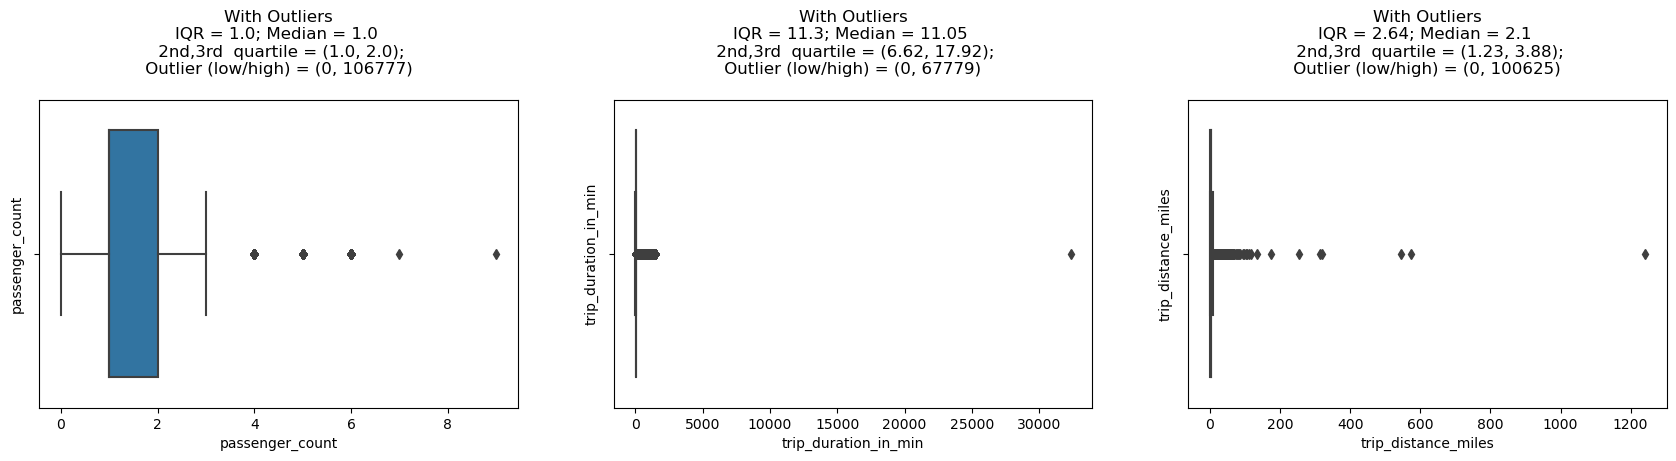

In [ ]:
UVA_outlier(data,ride_details )

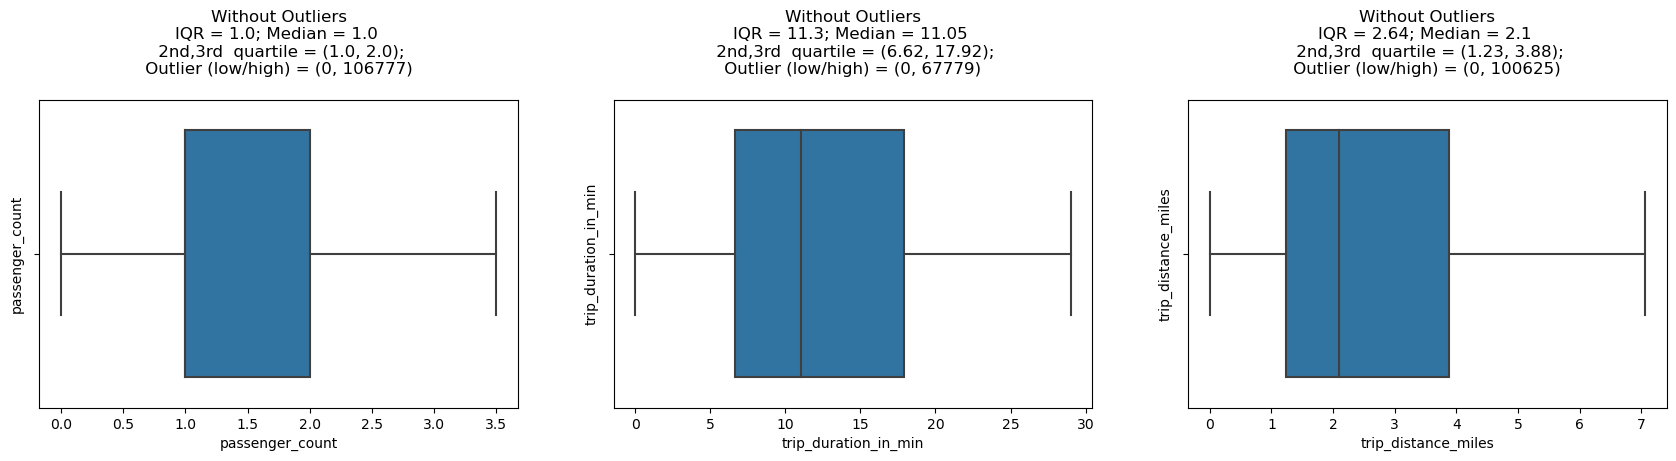

In [ ]:
UVA_outlier(data,ride_details, include_outlier=False )

Summary:
* Outliers in ride_details are significantly large in number.

## pickup_details

True
True
True
True
True
True


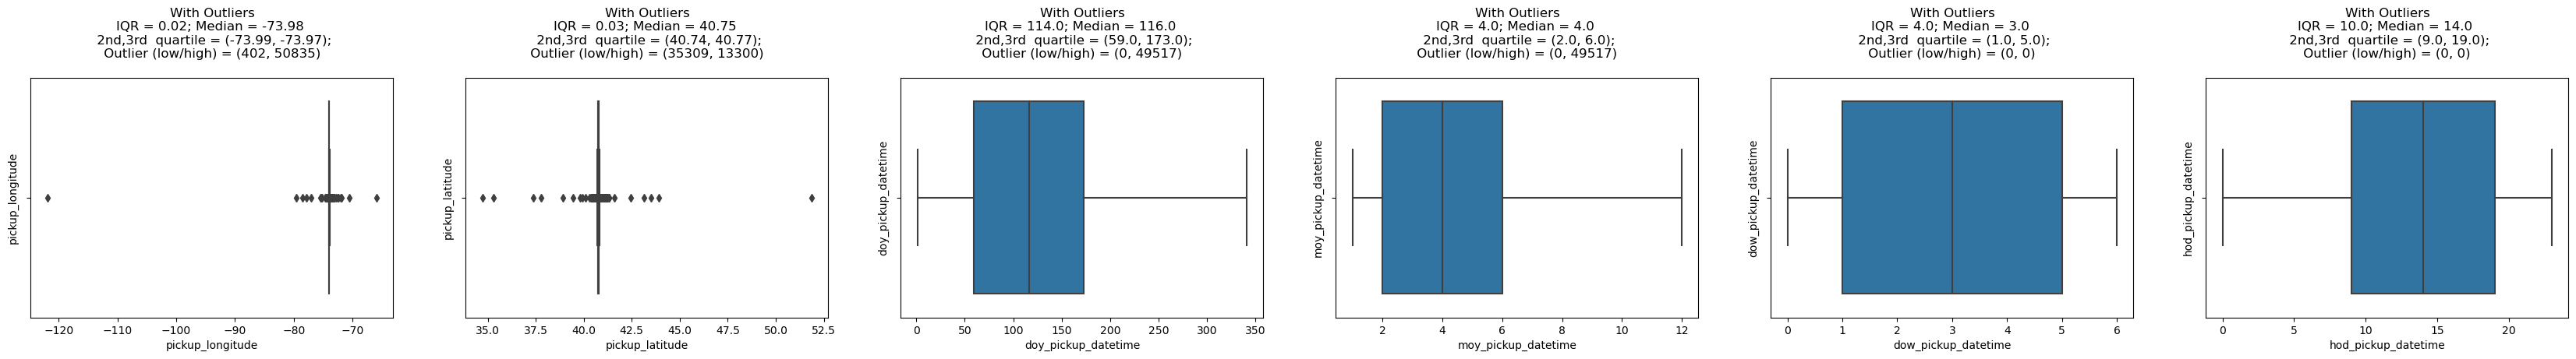

In [ ]:
UVA_outlier(data,pickup_details )

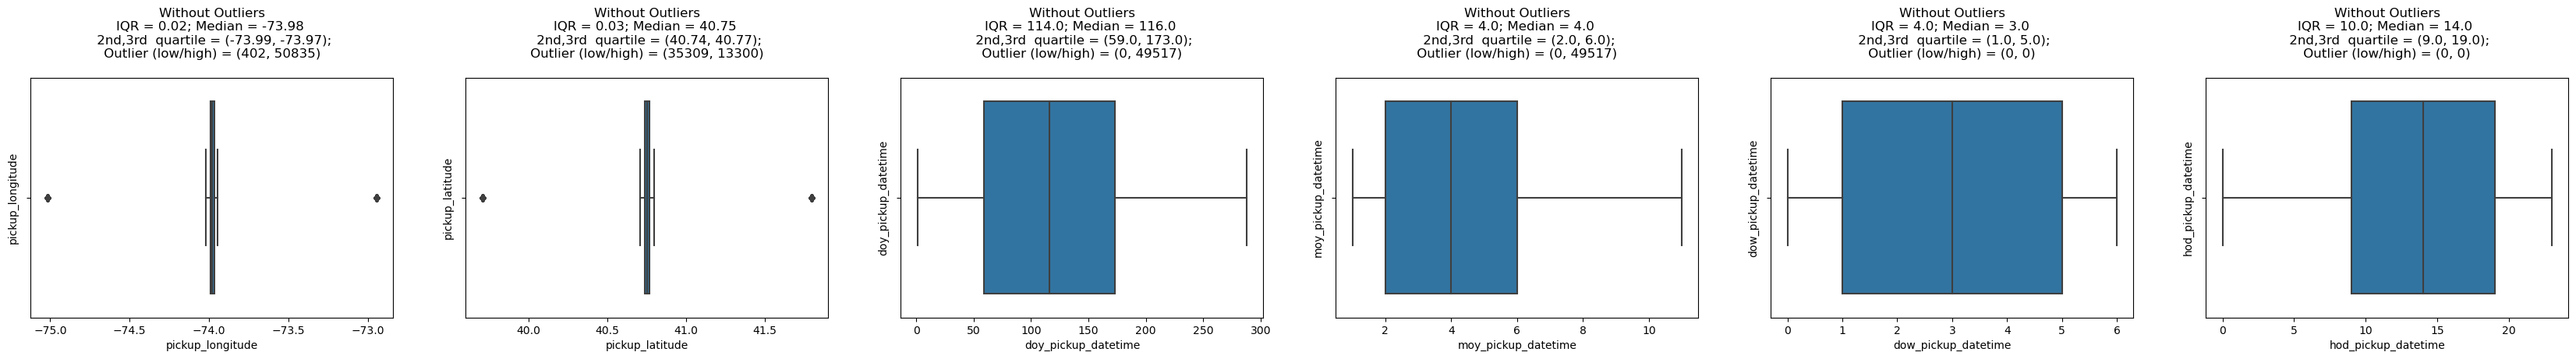

In [ ]:
UVA_outlier(data,pickup_details,include_outlier=False )

## dropoff_details

True
True
True
True
True
True


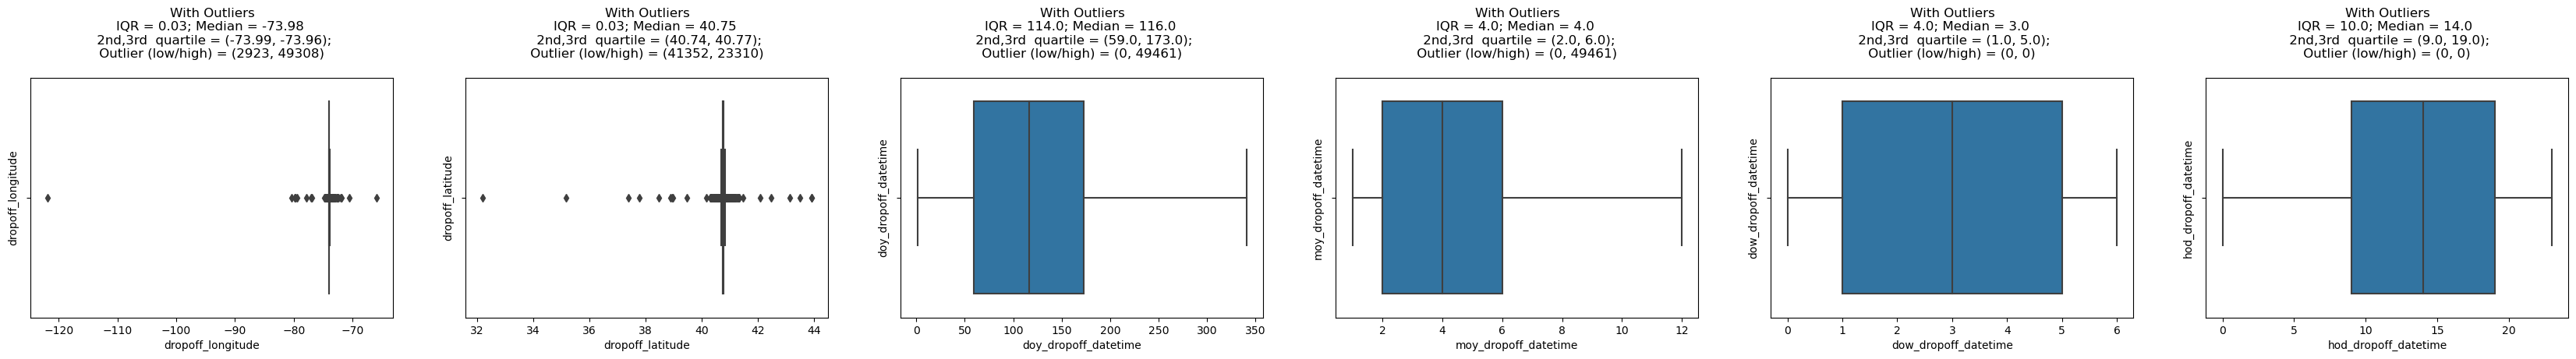

In [ ]:
UVA_outlier(data,dropoff_details )

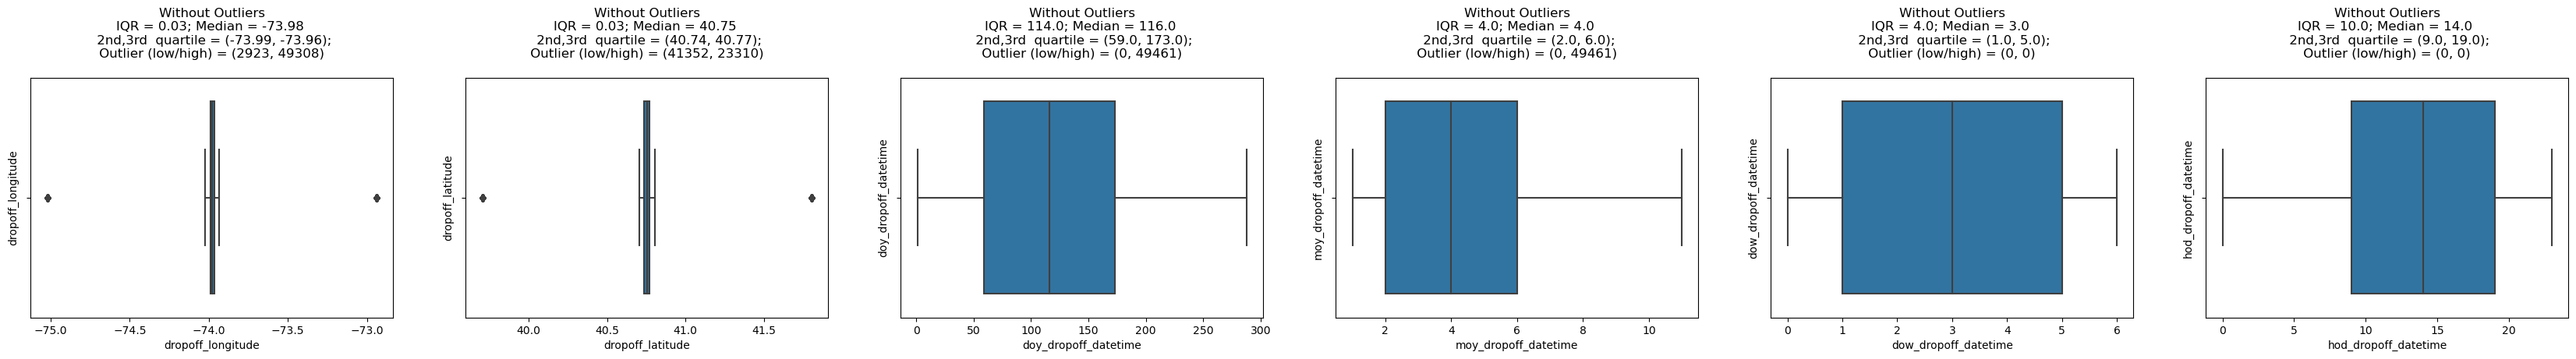

In [ ]:
UVA_outlier(data,dropoff_details,include_outlier=False )

**Summary:**
* If we look at corresponding plots in the outputs above, there seems to be a strong relation between the corresponding plots of pickup_details and dropoff_details.

* Outliers are significant in number and very similar in number between corresponding plots. Which indicates some inherent undiscovered behviour of Outliers.

### Outlier treatment

In [ ]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

passenger_count           int64
pickup_longitude        float64
pickup_latitude         float64
dropoff_longitude       float64
dropoff_latitude        float64
trip_duration_in_min    float64
trip_distance_miles     float64
doy_pickup_datetime       int64
moy_pickup_datetime       int64
dow_pickup_datetime       int64
hod_pickup_datetime       int64
doy_dropoff_datetime      int64
moy_dropoff_datetime      int64
dow_dropoff_datetime      int64
hod_dropoff_datetime      int64
dtype: object

In [ ]:
# replacing outliers with whisker values
for i in numerical:

    quant25 = numerical[i].quantile(0.25)
    quant75 = numerical[i].quantile(0.75)
    IQR = quant75 - quant25
    med = numerical[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)


    numerical[i][numerical[i]>whis_high] = whis_high+1
    numerical[i][numerical[i]<whis_low] = whis_low-1

## Univariate Analysis: Numerical Variables

In [ ]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64']).dtypes

passenger_count           int64
pickup_longitude        float64
pickup_latitude         float64
dropoff_longitude       float64
dropoff_latitude        float64
trip_duration_in_min    float64
trip_distance_miles     float64
doy_pickup_datetime       int64
moy_pickup_datetime       int64
dow_pickup_datetime       int64
hod_pickup_datetime       int64
doy_dropoff_datetime      int64
moy_dropoff_datetime      int64
dow_dropoff_datetime      int64
hod_dropoff_datetime      int64
dtype: object

In [ ]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

## ride_details

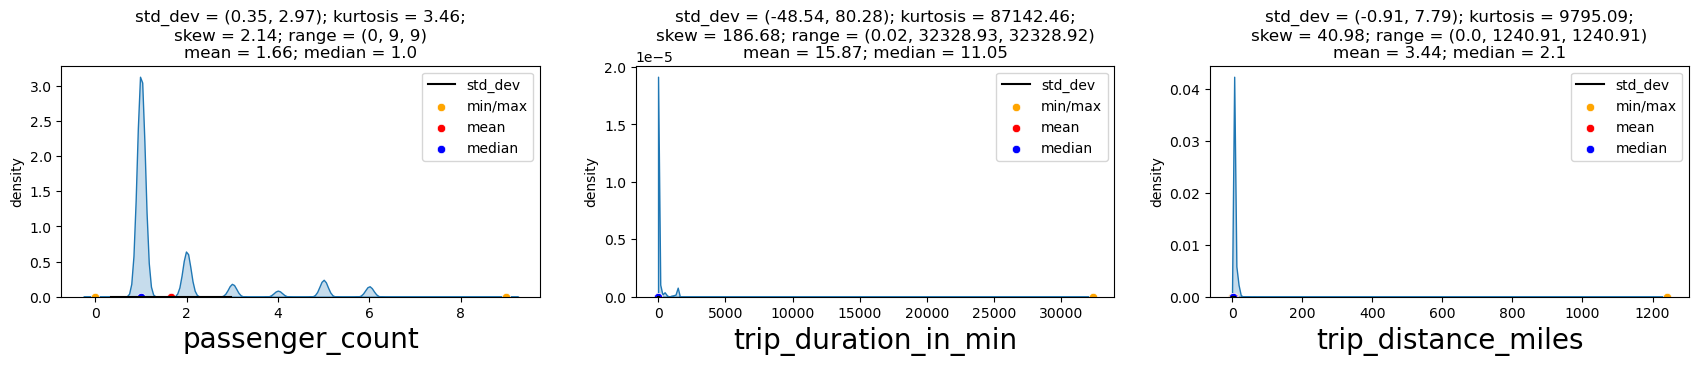

In [ ]:
UVA_numeric(data,ride_details)

## ride_details without outlier

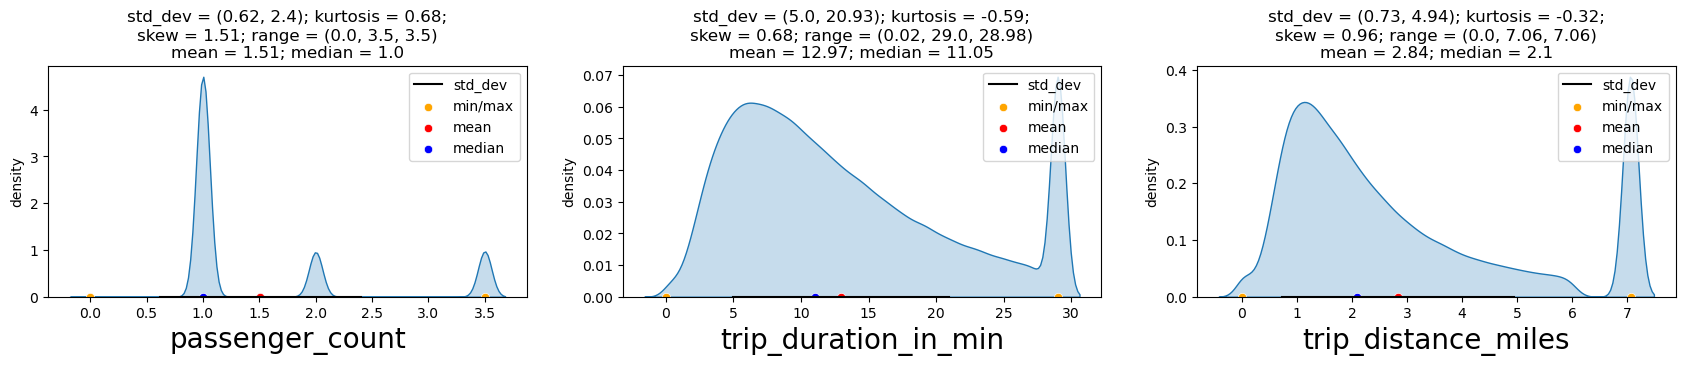

In [ ]:
UVA_numeric(numerical,ride_details)

**Summary of ride_details:**
*    **passenger_count**:
     *    Mostly the no, of passenger are 1 or 2
     *    **Kurtosis = 3.46**: Extreme values and Outliers are very likely to be present.
     *    **skewness** = 2.14 : this is right skewed

*    **trip_duration_in_min**:
    *    Median trip_duration_in_min = 11.5
    *    **Most of rides are of 0 to 30 min. duration**
    *    **Kurtosis = 87142.46**: Extreme values and Outliers are very likely to be present.
    *    **skewness** = 186.68 : this is right skewed

*    **trip_distance_miles:**
    *    Median trip_distance_miles = 2.1
    *    **Most of rides are of 0 to 7 miles distance**
    *    **Kurtosis = 9795.09**: Extreme values and Outliers are very likely to be present.
    *    **skewness** = 40.98 : this is right skewed
*    **After Removing extreme/outliers, plots are still very skewed.**     

## pickup_details

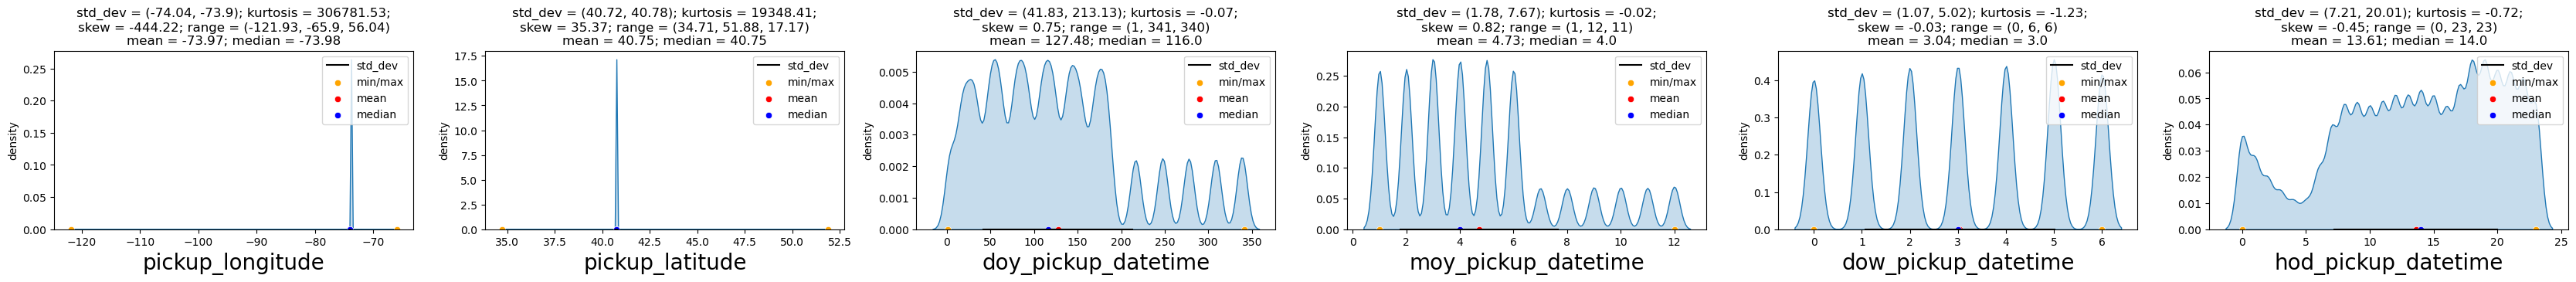

In [ ]:
UVA_numeric(data,pickup_details)

## pickup_details without outlier

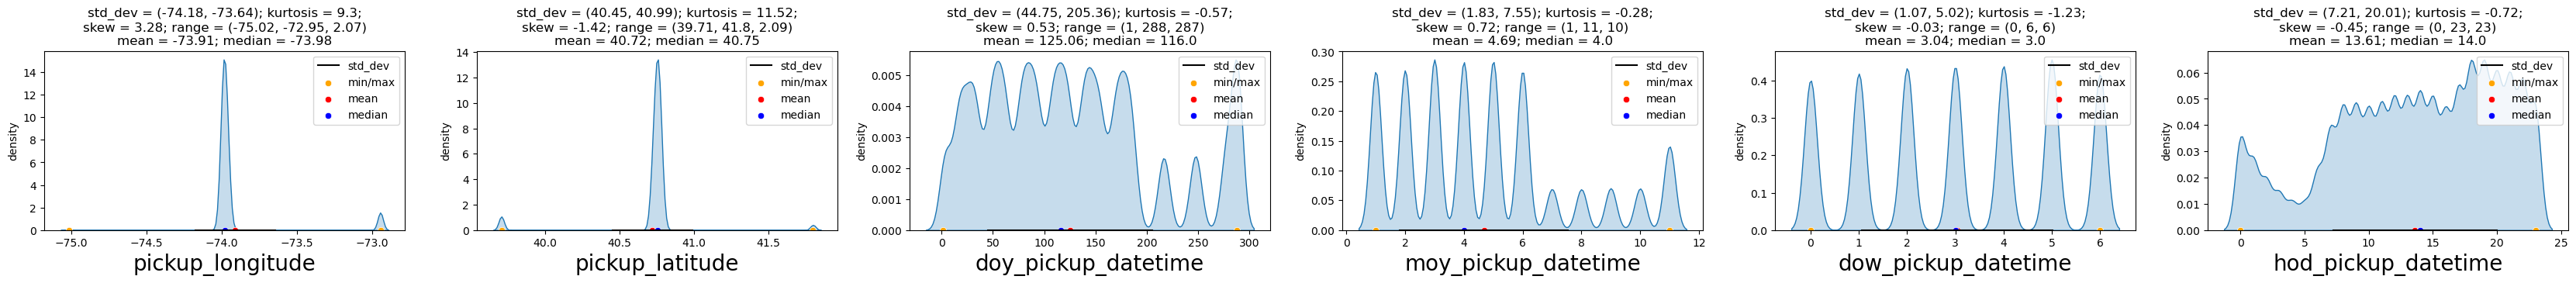

In [ ]:
UVA_numeric(numerical,pickup_details)

*    **Extreme values and Outliers are very likely to be present in pickup_longitude and pickup_latitude.**
*    **pickup_longitude, pickup_latitudeplots, doy_pickup_datetime, moy_pickup_datetime are right skewed.**
*    **dow_pickup_datetime, hod_pickup_datetime are symatric.**
*    **no. of rides is higher in first six months of the year.**
*    **no. of rides is highest between 18 O'clock to 22 O'clock.**
*    **After Removing extreme/outliers, plots are still very skewed.**  

## dropoff_details

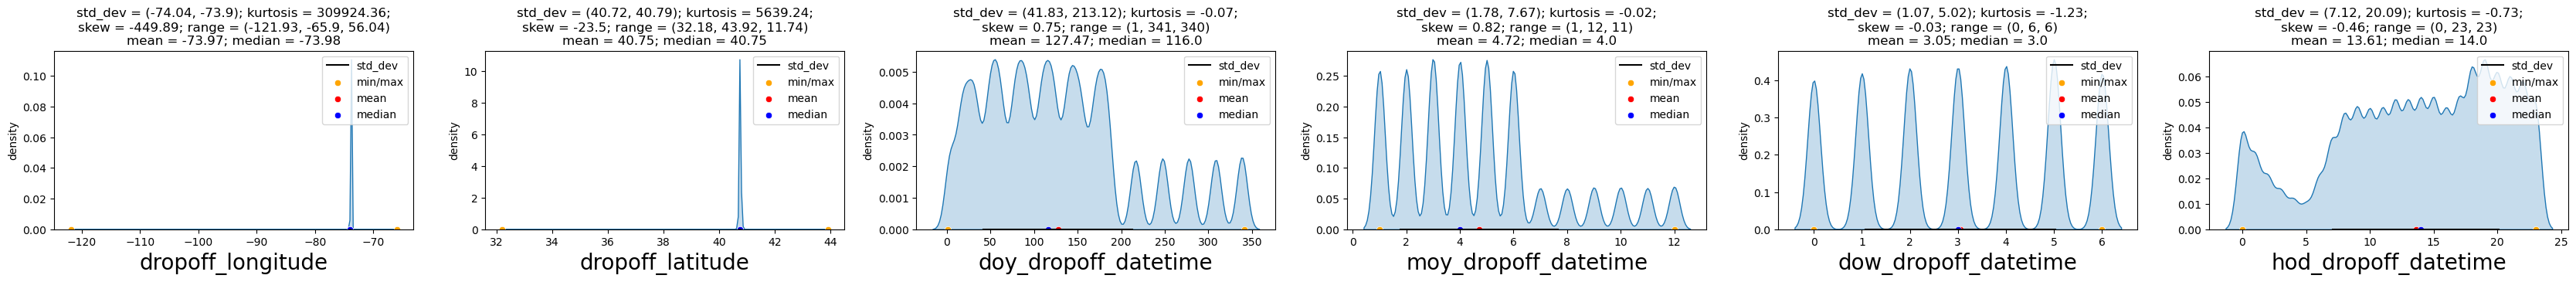

In [ ]:
UVA_numeric(data,dropoff_details)

## dropoff_details without outlier

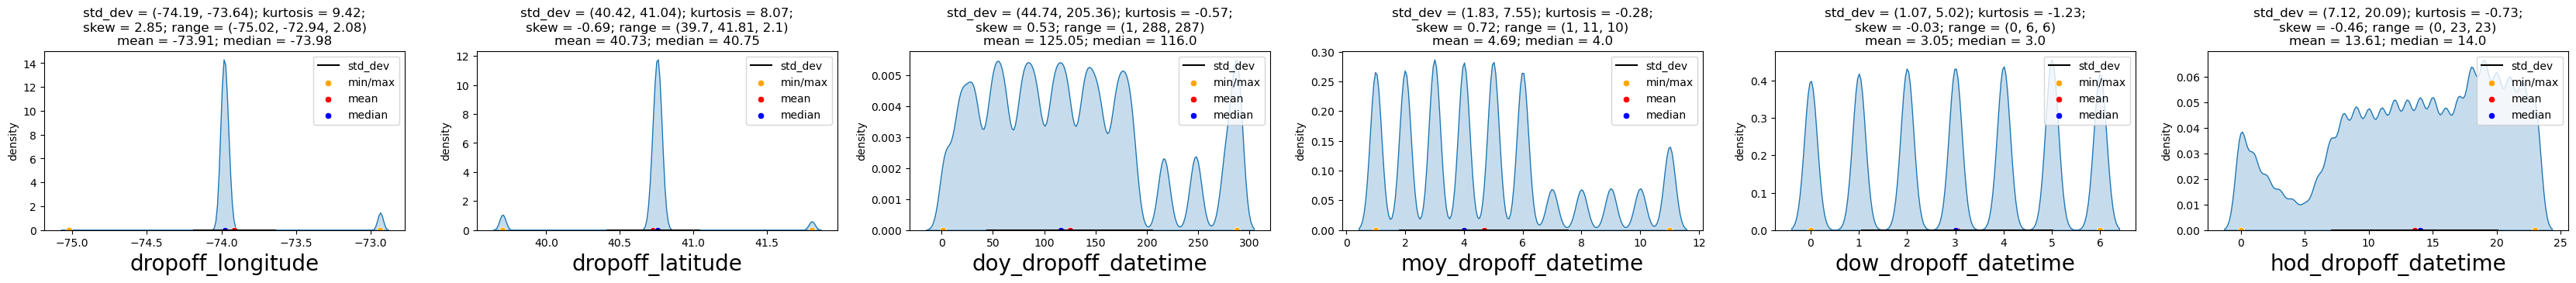

In [ ]:
UVA_numeric(numerical,dropoff_details)

*    **Extreme values and Outliers are very likely to be present in dropoff_longitude and dropoff_latitude.**
*    **dropoff_longitude, dropoff_latitudeplots, doy_dropoff_datetime, moy_dropoff_datetime are right skewed.**
*    **dow_dropoff_datetime, hod_dropoff_datetime are symatric.**
*    **no. of rides is higher in first six months of the year.**
*    **no. of rides is highest between 18 O'clock to 22 O'clock.**
*    **After Removing extreme/outliers, plots are still very skewed.**  

## Univariate Analysis : Categorical Varibales

In [ ]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

id                    category
vendor_id             category
store_and_fwd_flag    category
dtype: object

In [ ]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

## store_and_fwd_flag

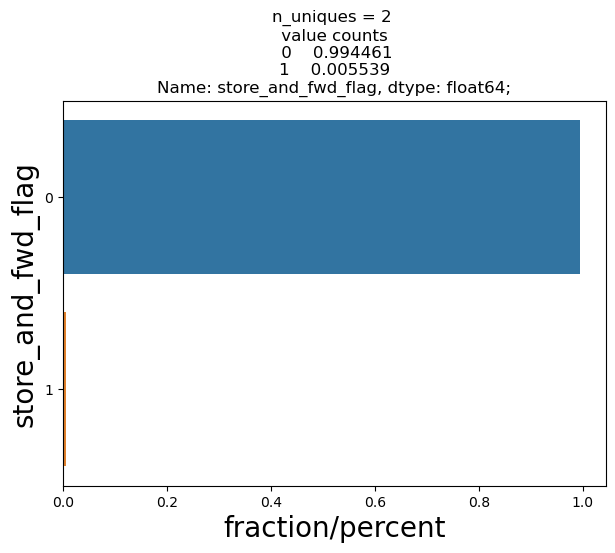

In [ ]:
UVA_category(data,['store_and_fwd_flag'])

*    **most of the time the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (1=store and forward; 0=not a store and forward trip)**

## vendor_id

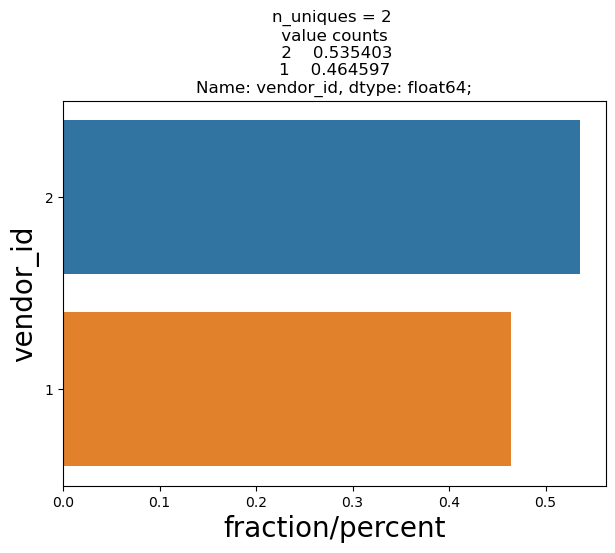

In [ ]:
UVA_category(data,['vendor_id'])

*    **no. of rides complited by vendor 2 is higher then vendor 1.**  

## Bivariate Analysis : Numerical-Numerical

In [ ]:
num = ['passenger_count','trip_duration_in_min','trip_distance_miles','pickup_longitude','pickup_latitude','doy_pickup_datetime','moy_pickup_datetime','dow_pickup_datetime','hod_pickup_datetime','dropoff_longitude','dropoff_latitude','doy_dropoff_datetime','moy_dropoff_datetime','dow_dropoff_datetime','hod_dropoff_datetime']

### Correlation Matrix

In [ ]:
# calculating correlation
correlation = data[num].dropna().corr()
correlation

passenger_count  trip_duration_in_min  \
passenger_count              1.000000              0.013022   
trip_duration_in_min         0.013022              1.000000   
trip_distance_miles          0.009175              0.125772   
pickup_longitude             0.001163              0.035447   
pickup_latitude             -0.004696             -0.038163   
doy_pickup_datetime         -0.001881              0.001635   
moy_pickup_datetime         -0.002005              0.001361   
dow_pickup_datetime          0.014145              0.000278   
hod_pickup_datetime          0.009851              0.002979   
dropoff_longitude           -0.000027              0.020664   
dropoff_latitude            -0.003944             -0.028283   
doy_dropoff_datetime        -0.001844              0.000669   
moy_dropoff_datetime        -0.001985              0.000313   
dow_dropoff_datetime         0.014458             -0.002468   
hod_dropoff_datetime         0.009214              0.003027   

                      trip_distance_miles  pickup_longitude  pickup_latitude  \
passenger_count                  0.009175          0.001163        -0.004696   
trip_duration_in_min             0.125772          0.035447        -0.038163   
trip_distance_miles              1.000000          0.251482        -0.128455   
pickup_longitude                 0.251482          1.000000         0.047635   
pickup_latitude                 -0.128455          0.047635         1.000000   
doy_pickup_datetime              0.003744          0.000925         0.001183   
moy_pickup_datetime              0.002917          0.000999         0.001813   
dow_pickup_datetime              0.000978         -0.011836        -0.017920   
hod_pickup_datetime             -0.016269          0.010754         0.011433   
dropoff_longitude                0.132353          0.780647         0.119970   
dropoff_latitude                -0.153760          0.118473         0.479352   
doy_dropoff_datetime             0.003648          0.000889         0.001183   
moy_dropoff_datetime             0.002846          0.000976         0.001814   
dow_dropoff_datetime             0.001641         -0.012030        -0.018028   
hod_dropoff_datetime            -0.020934          0.011170         0.018061   

                      doy_pickup_datetime  moy_pickup_datetime  \
passenger_count                 -0.001881            -0.002005   
trip_duration_in_min             0.001635             0.001361   
trip_distance_miles              0.003744             0.002917   
pickup_longitude                 0.000925             0.000999   
pickup_latitude                  0.001183             0.001813   
doy_pickup_datetime              1.000000             0.994900   
moy_pickup_datetime              0.994900             1.000000   
dow_pickup_datetime             -0.001110            -0.001659   
hod_pickup_datetime              0.002159             0.002335   
dropoff_longitude                0.001851             0.001806   
dropoff_latitude                -0.000089             0.000546   
doy_dropoff_datetime             0.997659             0.992767   
moy_dropoff_datetime             0.992562             0.997848   
dow_dropoff_datetime            -0.001233            -0.001765   
hod_dropoff_datetime             0.001711             0.001922   

                      dow_pickup_datetime  hod_pickup_datetime  \
passenger_count                  0.014145             0.009851   
trip_duration_in_min             0.000278             0.002979   
trip_distance_miles              0.000978            -0.016269   
pickup_longitude                -0.011836             0.010754   
pickup_latitude                 -0.017920             0.011433   
doy_pickup_datetime             -0.001110             0.002159   
moy_pickup_datetime             -0.001659             0.002335   
dow_pickup_datetime              1.000000            -0.054114   
hod_pickup_datetime             -0.054114             1.000000   
dropoff_longitu

### Heatmap

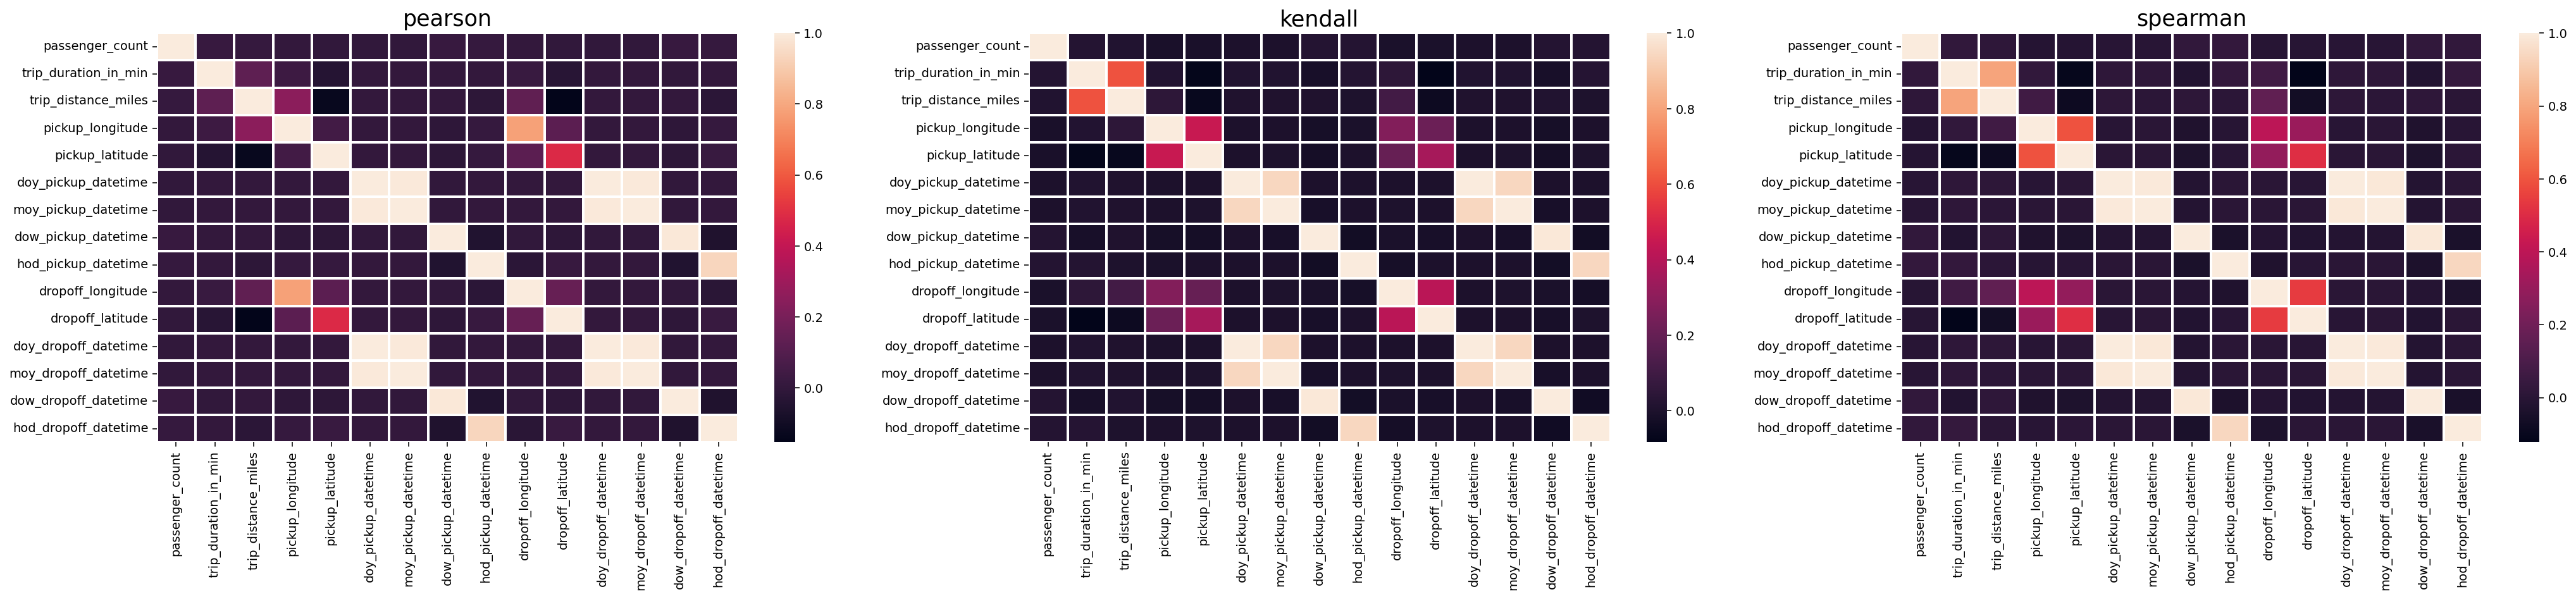

In [ ]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = data[num].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

## Heatmap without outlier

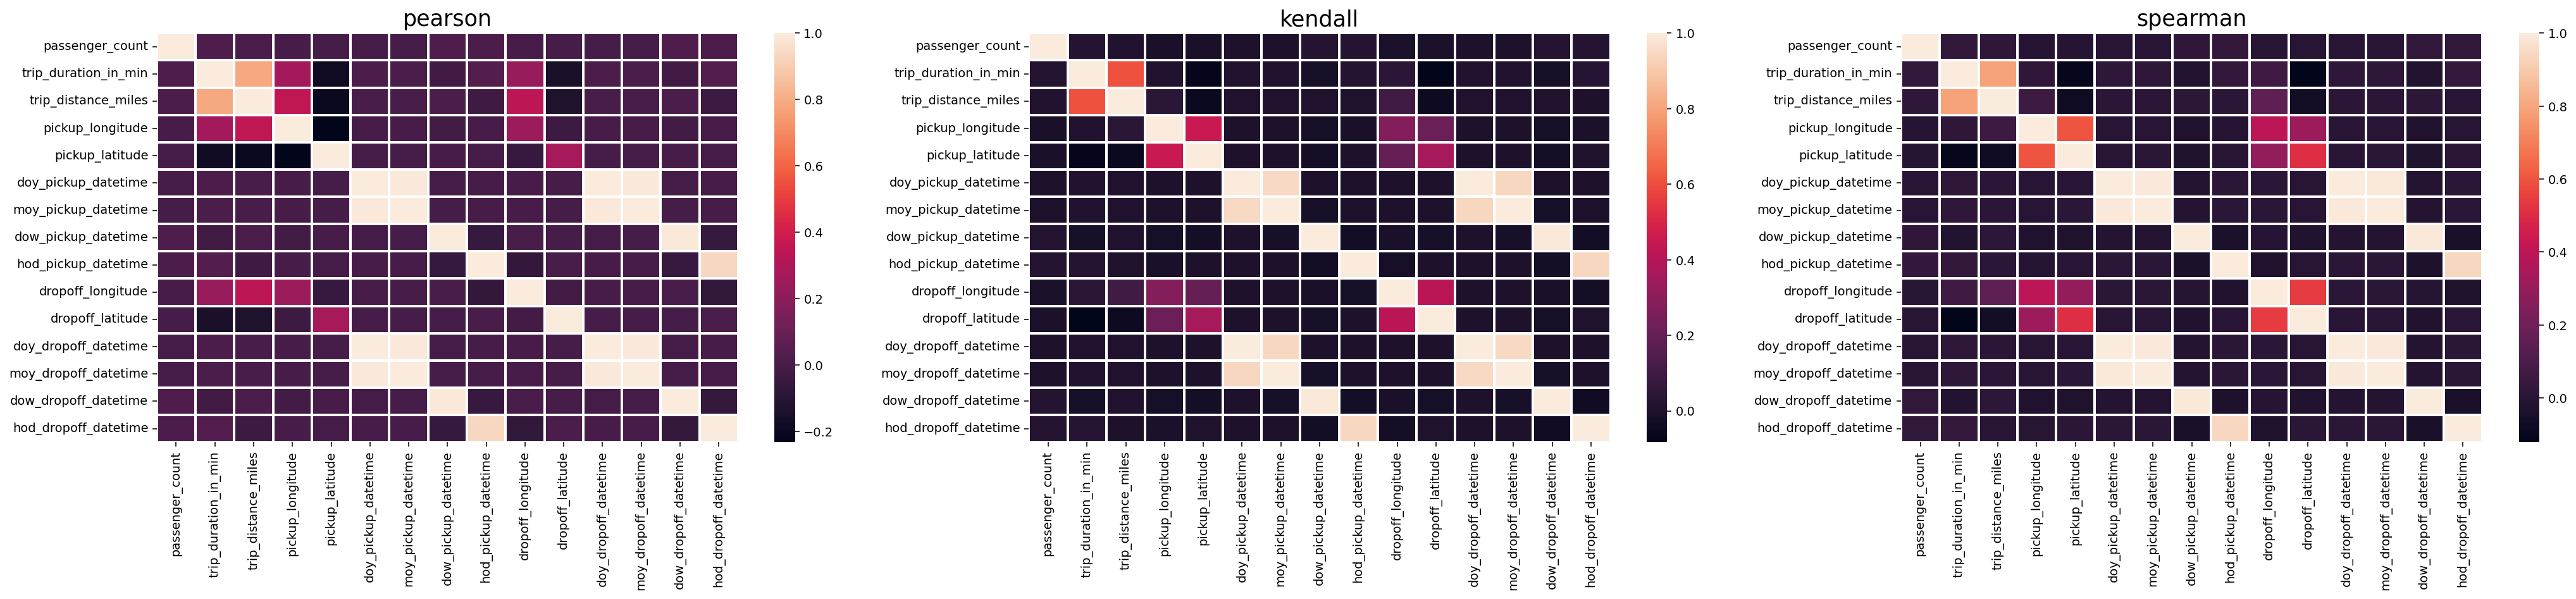

In [ ]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[num].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

**Inferences:**


1.  trip_duration_in_min and trip_distance_miles have a strong correlation among themselves.
2.  locatin variables have seems to have a very little correlation among themselves.
3.  date_and_time variables have a very strong correlation among themselves.


### Scatterplot

In [ ]:
# seggregating variables into groups
duration_vs_distance = ['trip_duration_in_min','trip_distance_miles']
location = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
date_and_time = ['doy_pickup_datetime','moy_pickup_datetime','dow_pickup_datetime','hod_pickup_datetime','doy_dropoff_datetime','moy_dropoff_datetime','dow_dropoff_datetime','hod_dropoff_datetime']


## duration_vs_distance

<Figure size 896x672 with 0 Axes>

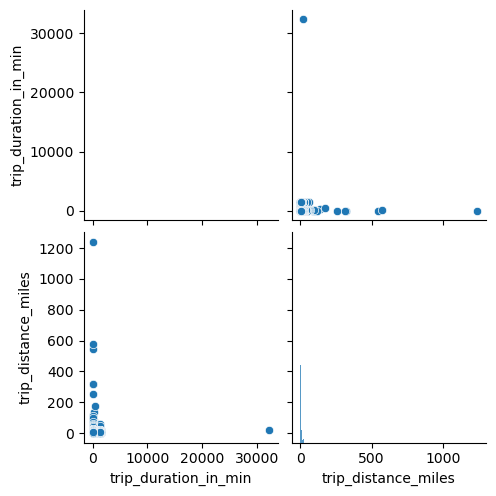

In [ ]:
plt.figure(dpi=140)
sns.pairplot(data[duration_vs_distance])

**the scatter plot is is not meaningful due to the presence of outliers**

## duration_vs_distance without outlier

<Figure size 896x672 with 0 Axes>

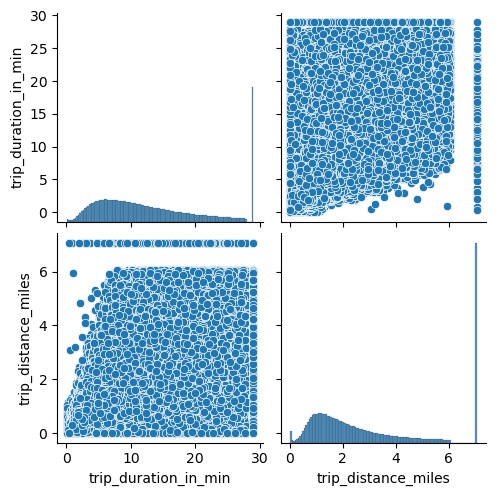

In [ ]:

plt.figure(dpi=140)
sns.pairplot(numerical[duration_vs_distance])

**Inferences**
1.    This validates the high correlation between the transaction variables.
2.    This high correlation can be used for feature engineering during the later stages.

## location

<Figure size 896x672 with 0 Axes>

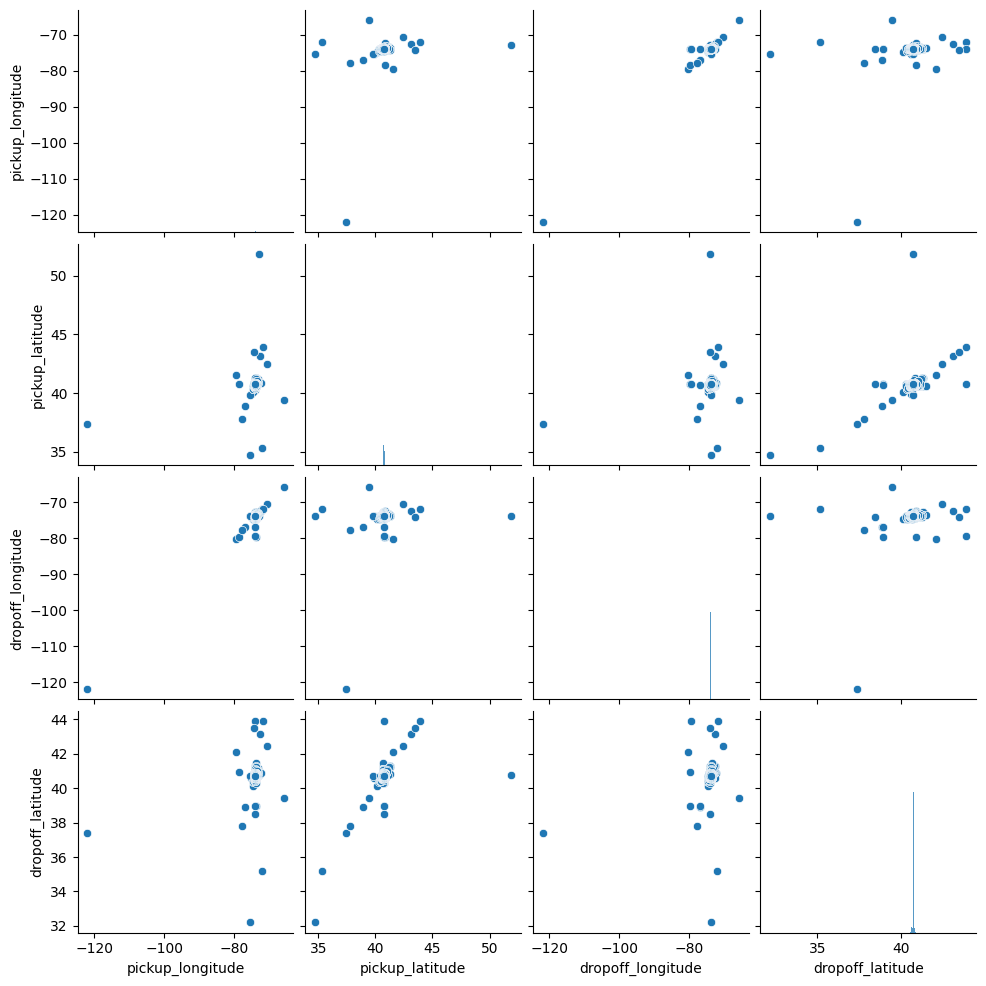

In [ ]:
plt.figure(dpi=140)
sns.pairplot(data[location])

**the scatter plot is is not meaningful due to the presence of outliers**

## location without outlier

<Figure size 896x672 with 0 Axes>

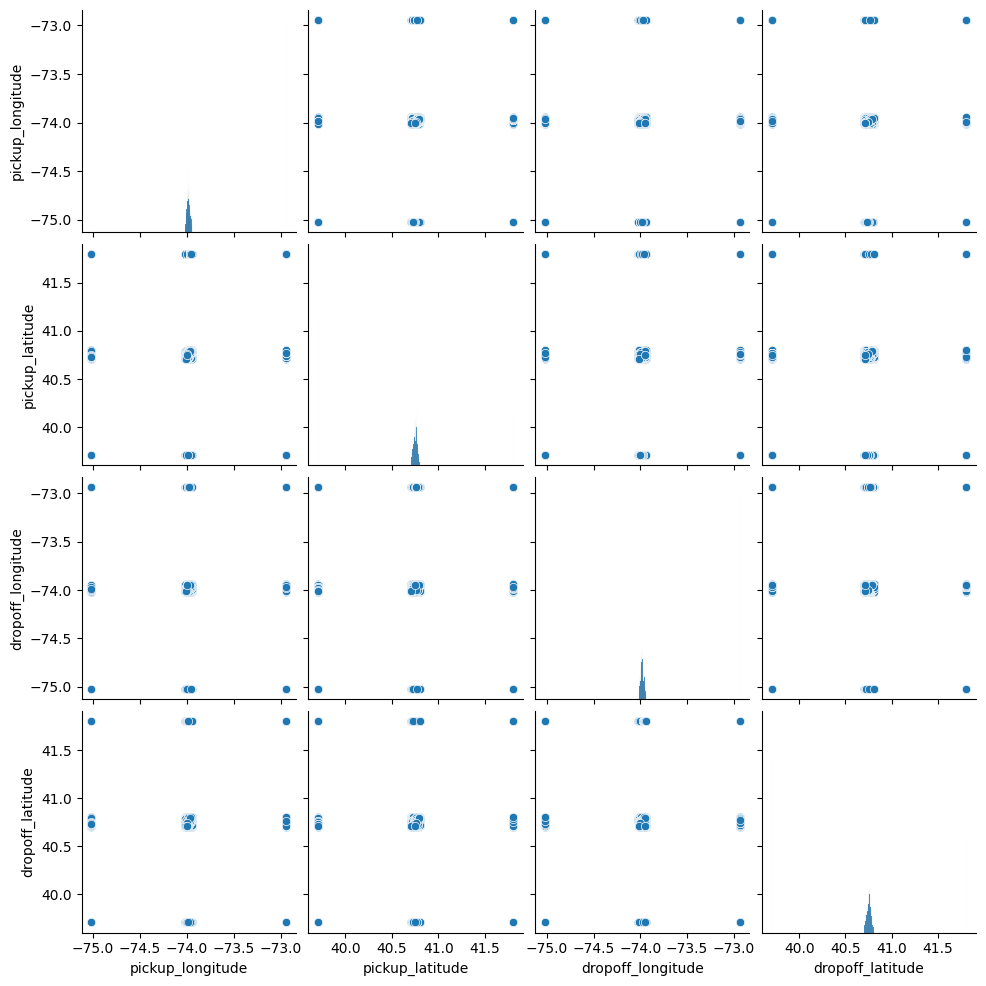

In [ ]:
plt.figure(dpi=140)
sns.pairplot(numerical[location])

**Inferences**
-           These plots shows a very little correlation between the transaction variables.

## date_and_time

<Figure size 896x672 with 0 Axes>

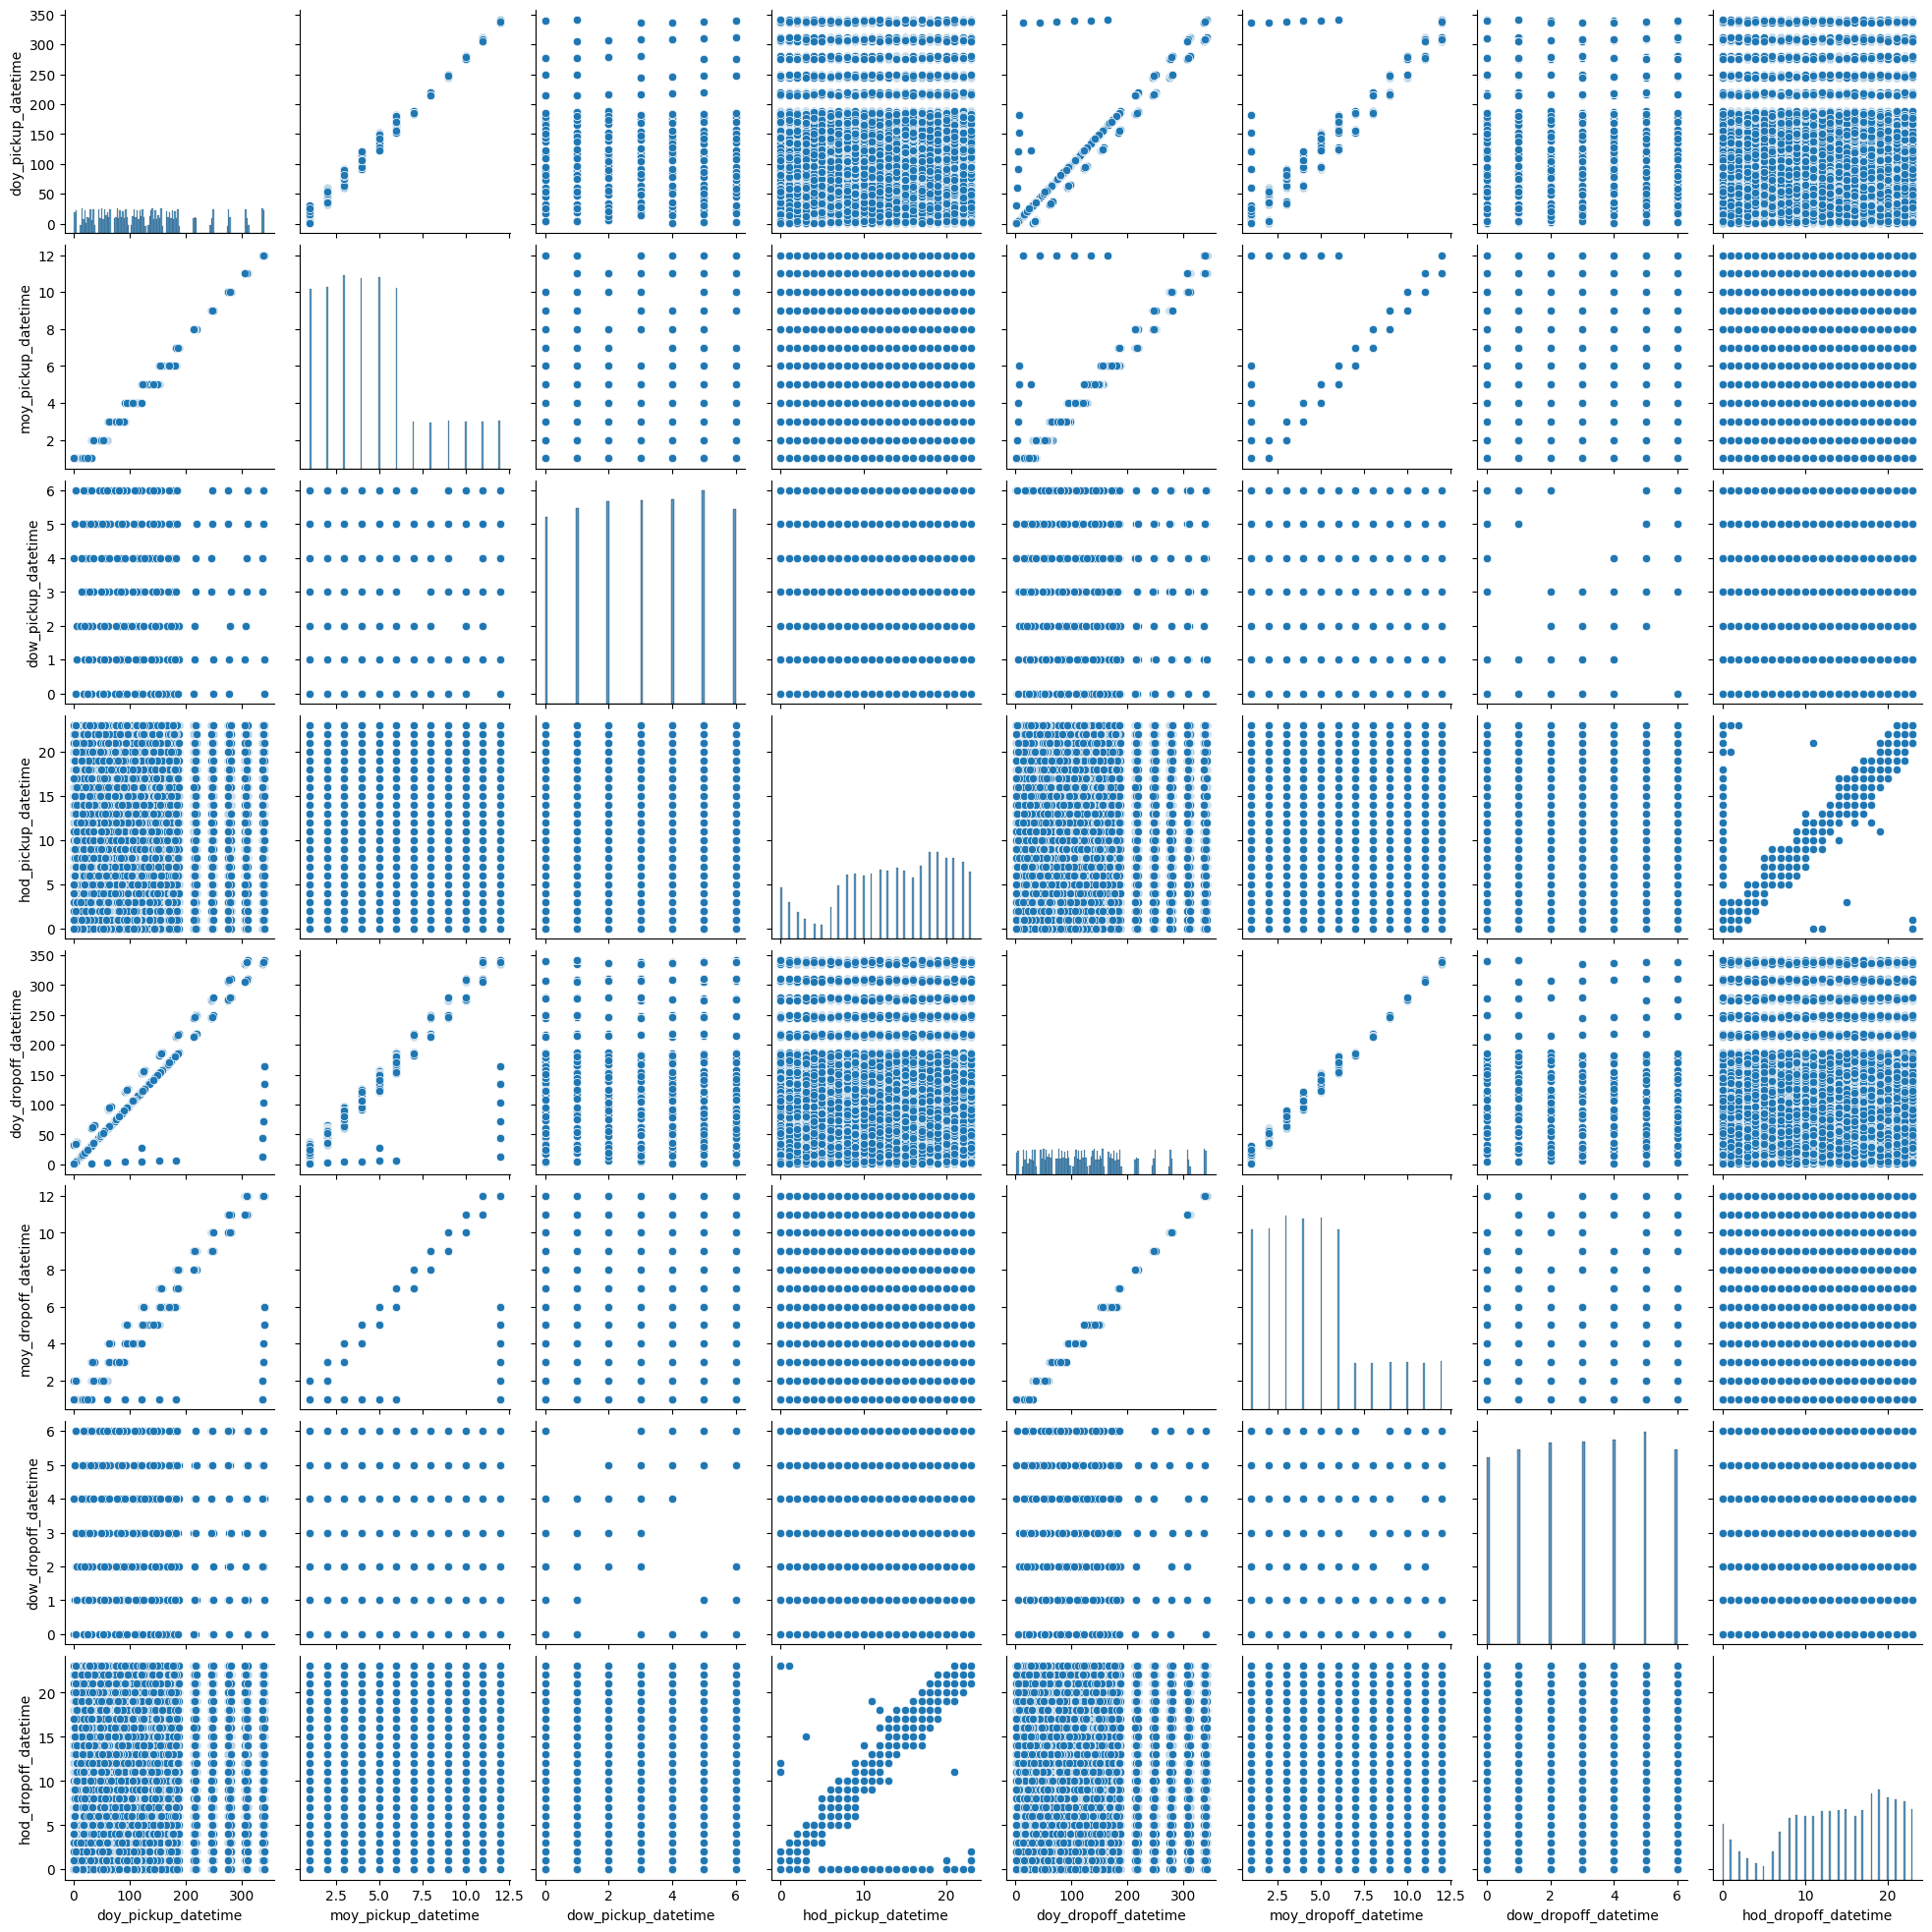

In [ ]:
plt.figure(dpi=140)
sns.pairplot(data[date_and_time])

**the scatter plot is is not meaningful due to the presence of outliers**

## date_and_time without outlier

<Figure size 896x672 with 0 Axes>

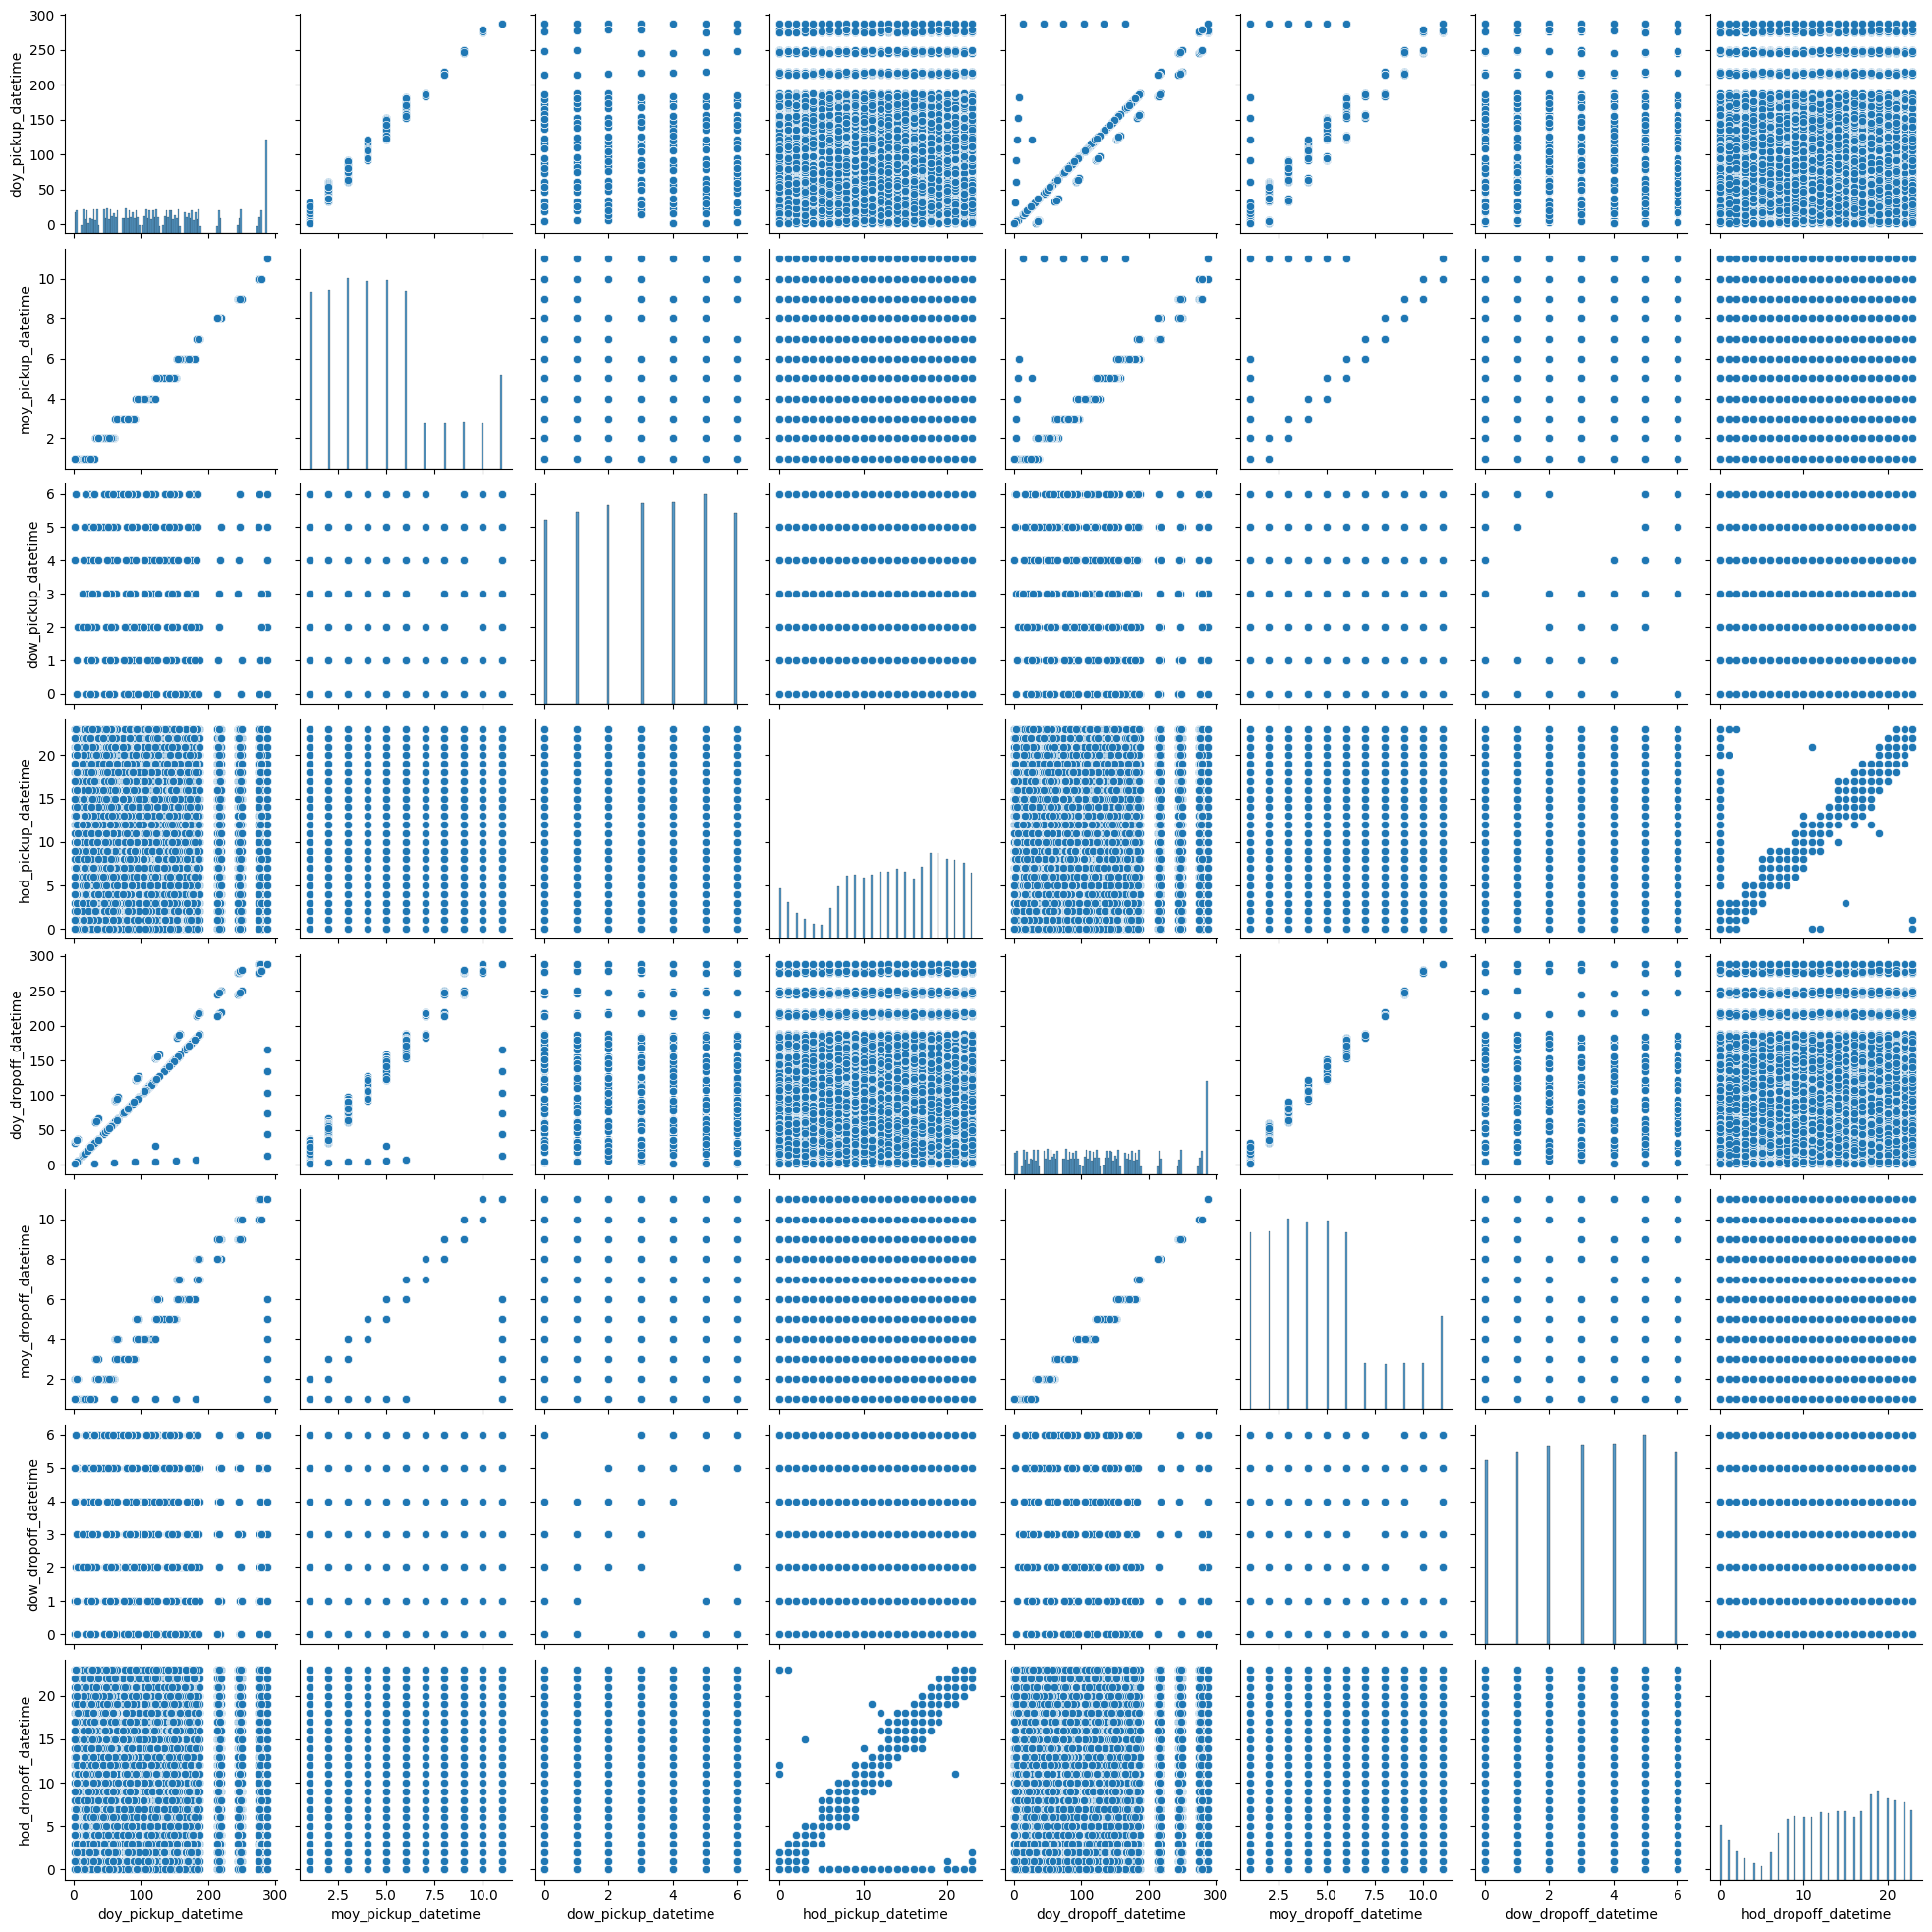

In [ ]:
plt.figure(dpi=140)
sns.pairplot(numerical[date_and_time])

**Inferences**
1.    This validates the very high correlation between the transaction variables.
2.    This high correlation can be used for feature engineering during the later stages.